# Reddit Predictor - DS Task

Making a rank/score predictor based on the dataset with Cross validation.



# Installing a package in python

In [2]:
import pip    
def install(package):
   pip.main(['install', package])

# install('package_name')



# Loading required packages

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; # Seaborn is a library for making attractive and informative statistical graphics in Python
from sklearn.linear_model import LinearRegression
import pylab as pl

seaborn.set()


# Getting the current working directory and changing the directory as well.

In [4]:
import os
print os.getcwd()
os.chdir('C://users/Shivam Panchal/Documents')

C:\Users\Shivam Panchal\Documents\scikit-learn-data analysis in python\scikit-learn-videos-master


In [5]:
# Importing the Data
import pandas as pd 
data = pd.read_csv('AmericanPolitics.csv')

# Exploration of Data

In [6]:
list(data.columns)

['created_utc',
 'score',
 'domain',
 'id',
 'title',
 'author',
 'ups',
 'downs',
 'num_comments',
 'permalink',
 'selftext',
 'link_flair_text',
 'over_18',
 'thumbnail',
 'subreddit_id',
 'edited',
 'link_flair_css_class',
 'author_flair_css_class',
 'is_self',
 'name',
 'url',
 'distinguished']

In [7]:
data.head(10)

,created_utc,score,domain,id,title,author,ups,downs,num_comments,permalink,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.360063e+09,75,reason.com,17xesg,Someone Just Leaked Obama's Rules for Assassin...,thebrightsideoflife,80,5,24,http://www.reddit.com/r/AmericanPolitics/comme...,...,False,NaN,t5_2qied,False,NaN,NaN,False,t3_17xesg,http://reason.com/blog/2013/02/04/someone-just...,NaN
1,1.358034e+09,63,petitions.whitehouse.gov,16gmw0,Remove United States District Attorney Carmen ...,djdonnell,72,9,2,http://www.reddit.com/r/AmericanPolitics/comme...,...,False,NaN,t5_2qied,False,NaN,NaN,False,t3_16gmw0,https://petitions.whitehouse.gov/petition/remo...,NaN
2,1.363187e+09,54,slate.com,1a7ule,Barack Obama promised transparency: The White ...,thebrightsideoflife,61,7,1,http://www.reddit.com/r/AmericanPolitics/comme...,...,False,NaN,t5_2qied,False,NaN,NaN,False,t3_1a7ule,http://www.slate.com/articles/news_and_politic...,NaN
3,1.350433e+09,44,rt.com,11lmw4,Police arrest US presidential candidate Jill S...,molib,48,4,13,http://www.reddit.com/r/AmericanPolitics/comme...,...,False,NaN,t5_2qied,False,NaN,NaN,False,t3_11lmw4,https://rt.com/usa/news/police-jill-stein-deba...,NaN
4,1.313470e+09,42,mediaite.com,jk5ey,Jon Stewart Scolds Media For Ignoring Rep. Ron...,thebrightsideoflife,49,7,3,http://www.reddit.com/r/AmericanPolitics/comme...,...,False,NaN,t5_2qied,False,NaN,NaN,False,t3_jk5ey,http://www.mediaite.com/tv/jon-stewart-scolds-...,NaN
5,1.370519e+09,40,theatlantic.com,1fs9gh,"Thank You, Unknown Patriot, for Exposing the S...",daylily,40,0,7,http://www.reddit.com/r/AmericanPolitics/comme...,...,False,NaN,t5_2qied,False,NaN,NaN,False,t3_1fs9gh,http://www.theatlantic.com/politics/archive/20...,NaN
6,1.352397e+09,39,i.imgur.com,12v6qt,Forward: Same as it ever was.,esparza74,60,21,15,http://www.reddit.com/r/AmericanPolitics/comme...,...,False,NaN,t5_2qied,False,NaN,NaN,False,t3_12v6qt,http://i.imgur.com/mS0qX.jpg,NaN
7,1.368535e+09,39,youtube.com,1eb6jf,"Jon Stewart Destroys Obama Over IRS Scandal, '...",thebrightsideoflife,45,6,60,http://www.reddit.com/r/AmericanPolitics/comme...,...,False,NaN,t5_2qied,False,NaN,NaN,False,t3_1eb6jf,https://www.youtube.com/watch?feature=player_e...,NaN
8,1.347925e+09,41,motherjones.com,101sd8,SECRET VIDEO: Romney Tells Millionaire Donors ...,yBagno,48,7,2,http://www.reddit.com/r/AmericanPolitics/comme...,...,False,NaN,t5_2qied,False,NaN,NaN,False,t3_101sd8,http://www.motherjones.com/politics/2012/09/se...,NaN
9,1.321310e+09,38,youtube.com,mcaml,Herman Cain struggles to answer question about...,luvcrunch,42,4,8,http://www.reddit.com/r/AmericanPolitics/comme...,...,False,NaN,t5_2qied,False,NaN,NaN,False,t3_mcaml,http://www.youtube.com/watch?v=WW_nDFKAmCo,NaN


In [8]:
data.describe()

,created_utc,score,ups,downs,num_comments,link_flair_text,thumbnail,link_flair_css_class,author_flair_css_class
count,9.970000e+02,997.000000,997.000000,997.000000,997.000000,0.0,0.0,0.0,0.0
mean,1.319635e+09,15.873621,20.096289,4.222668,2.587763,NaN,NaN,NaN,NaN
std,4.378123e+07,6.175323,7.474640,3.254988,4.322303,NaN,NaN,NaN,NaN
min,1.217184e+09,6.000000,10.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1.294323e+09,12.000000,15.000000,2.000000,0.000000,NaN,NaN,NaN,NaN
50%,1.335820e+09,14.000000,18.000000,4.000000,1.000000,NaN,NaN,NaN,NaN
75%,1.352232e+09,18.000000,23.000000,6.000000,3.000000,NaN,NaN,NaN,NaN
max,1.376010e+09,75.000000,80.000000,32.000000,60.000000,NaN,NaN,NaN,NaN


# Exploring the relationship between various features and output features.

# Feature Selection

How do I decide which features to include in a linear model? Here's one idea:

Try different models, and only keep predictors in the model if they have small p-values.

Check whether the R-squared value goes up when you add new predictors.

What are the drawbacks to this approach?

Linear models rely upon a lot of assumptions (such as the features being independent), and if those assumptions are violated (which they usually 
are), R-squared and p-values are less reliable.

Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are pure noise, 5 of them (on average) will still be counted as significant.

R-squared is susceptible to overfitting, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

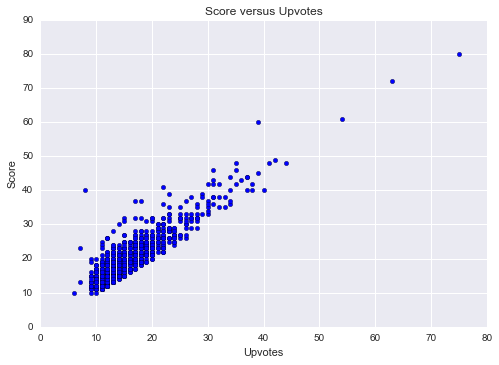

In [9]:
fig = plt.figure()
plot1 = fig.add_subplot(1,1,1)
plot1.scatter(data['score'],data['ups'])
plt.title('Score versus Upvotes')
plt.xlabel('Upvotes')
plt.ylabel('Score')
plt.show()

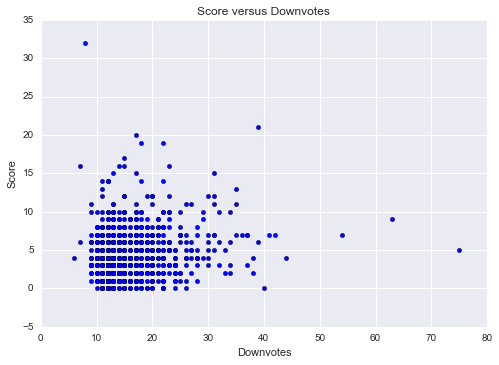

In [10]:
fig = plt.figure()
plot2 = fig.add_subplot(1,1,1)
plot2.scatter(data['score'],data['downs'])
plt.title('Score versus Downvotes')
plt.xlabel('Downvotes')
plt.ylabel('Score')
plt.show()

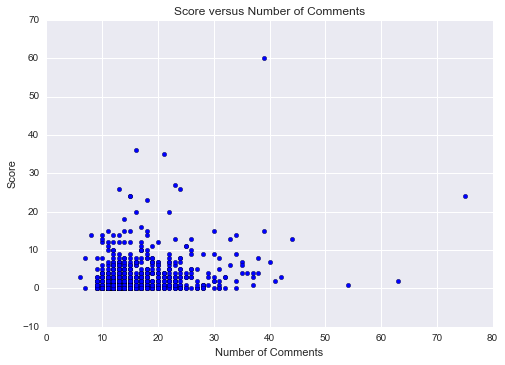

In [11]:
fig = plt.figure()
plot3 = fig.add_subplot(1,1,1)
plot3.scatter(data['score'],data['num_comments'])
plt.title('Score versus Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Score')
plt.show()

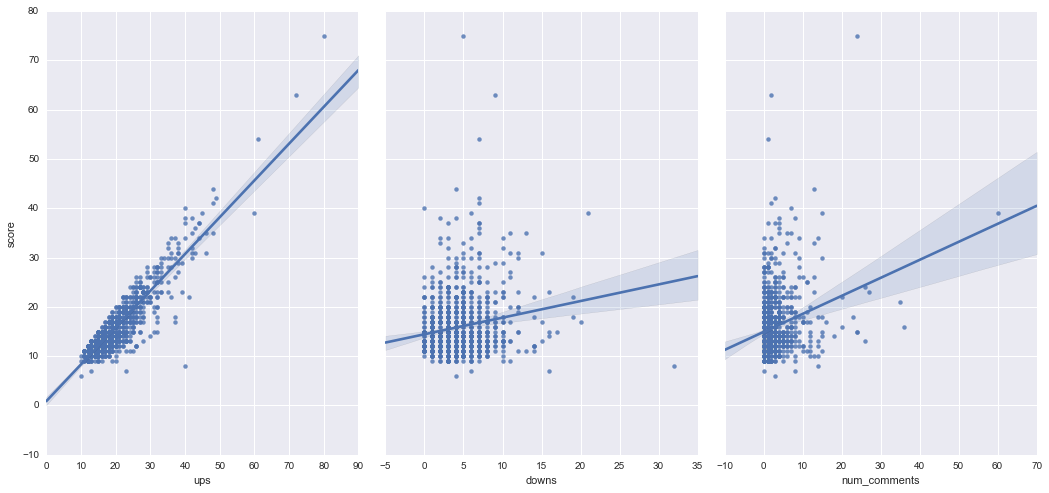

In [12]:
# visualize the relationship between the features and the response using scatterplots
seaborn.pairplot(data, x_vars=['ups','downs','num_comments'], y_vars='score', size=7, aspect=0.7, kind='reg')

In the given dataset, we came to the conclusion that, our target feature i.e. SCORE is dependent upon some variables and independent of some varialbles, #'ups' is a strong variable to preddict the score feature.

'downs' and 'num_comments' are not strong features and did not hold any strong relationship for predicting the score feature, but they were assumed to be consisting of a good relation, buts its not true, as can be seen from above graph.


Nw, there are variables such as 
'created_utc', 
'domain', 
'id', 
'title', 
'author', 
'permalink', 
'selftext', 
'link_flair_text', 
'thumbnail', link_flair_css_class',
'author_flair_css_class',
's_self',
'name',
'url', 
'distinguished',
'subreddit_id', 

these have no significant relation in predicting the score feature.

Many of them are even empty columns.

Now, categorical variables like, 'over_18' and 'edited' are also same foe all the posts, so they will also have no significance in predicting the sore feature.


The only variable we are left with is 'ups' , which is a strong feature in predicting the score.




In [13]:
feature_cols = ['ups','downs','num_comments']
X = data[feature_cols]
X.head(10)


,ups,downs,num_comments
0,80,5,24
1,72,9,2
2,61,7,1
3,48,4,13
4,49,7,3
5,40,0,7
6,60,21,15
7,45,6,60
8,48,7,2
9,42,4,8


# Agenda

Using the **train/test split** procedure for model evaluation?
How does **K-fold cross-validation** overcome this limitation?
How can cross-validation be used for selecting **tuning parameters**, choosing between **models**, and selecting **features**?
What are some possible **improvements** to cross-validation?

In [14]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(997, 3)


In [15]:
y = data['score']
y.head()

0    75
1    63
2    54
3    44
4    42
Name: score, dtype: int64

In [16]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(997L,)


# Cross validation for the dataset

In [17]:
from sklearn.cross_validation import cross_val_score

In [18]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [22]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.448


In [23]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], data[1]))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [24]:
from sklearn.cross_validation import cross_val_score

In [26]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[ 0.44354839  0.5         0.55140187  0.50980392  0.52525253  0.56122449
  0.61956522  0.64835165  0.61363636  0.57142857]


In [27]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.554421299368


In [28]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.70330977173661791, 0.63198125671929195, 0.57956438267626298, 0.5748596991655931, 0.55442129936806106, 0.53548129474752582, 0.5106859279584065, 0.4940002576523404, 0.49564786738687727, 0.48311584752416009, 0.46964872171603272, 0.4433289821773142, 0.44158007032462737, 0.43895219819054104, 0.40764037828936966, 0.39908434358102018, 0.38887538332622429, 0.38469683234053287, 0.37191596502969126, 0.36521209727567899, 0.35270790165611843, 0.33132449614845733, 0.32843731608034843, 0.31634163454134018, 0.29490788887778652, 0.29217852517366616, 0.27536677613160321, 0.26695231057424262, 0.25702523683182227, 0.26176655981347785]


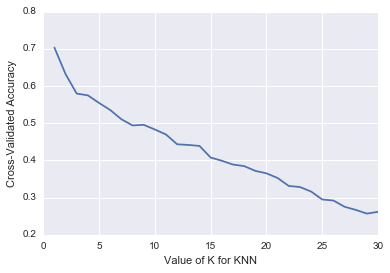

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Splitting the dataset into training and testin model

In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(747, 3)
(747L,)
(250, 3)
(250L,)


# Developing the linear predictive model.

In [32]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

-7.1054273576e-15
[  1.00000000e+00  -1.00000000e+00   1.36873700e-16]


In [35]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('ups', 1.0000000000000004),
 ('downs', -1.0000000000000002),
 ('num_comments', 1.3687369962001413e-16)]

In [36]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [37]:
y_pred

array([ 17.,  12.,  13.,   9.,  17.,   9.,  17.,  14.,  14.,  27.,  11.,
        23.,  17.,  17.,  12.,  20.,  23.,  39.,  10.,  13.,  12.,  11.,
        13.,  12.,  10.,  22.,  21.,  12.,  13.,  11.,  10.,  11.,  11.,
        13.,  14.,  17.,  22.,  10.,  12.,  13.,  12.,  13.,  22.,  22.,
        21.,  14.,  13.,  27.,   8.,  13.,  14.,  28.,  12.,  30.,  22.,
        12.,  10.,  11.,  13.,  13.,  17.,  17.,  14.,  13.,  13.,  13.,
        12.,  13.,  13.,  34.,  10.,  11.,  20.,   9.,  15.,  25.,  17.,
        14.,  16.,  12.,  17.,  12.,  10.,  13.,  11.,  15.,  10.,  13.,
        13.,  10.,  13.,  19.,  14.,  11.,  14.,  15.,  11.,  11.,  19.,
        20.,  15.,  35.,  13.,  21.,  10.,  13.,  18.,  12.,  19.,  13.,
        14.,  13.,  11.,  26.,  11.,  20.,  13.,  12.,  24.,  11.,  20.,
        17.,  44.,  17.,  14.,  12.,  10.,  15.,  14.,  12.,  13.,  18.,
        13.,  54.,  11.,  16.,  12.,  11.,  13.,  13.,  25.,  23.,  10.,
        11.,  22.,  11.,  12.,  10.,  12.,  15.,  1

In [39]:
# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.77366096265e-15
